## CNN Model trained using features extracted from audio files. The labels have been processed to include intensity of the emotions.  Below we have experimented with different batch sizes and number of epochs. 

In [1]:
import os
import pandas as pd
import numpy as np
import pickle
import tensorflow as tf
from matplotlib.image import imread
from numpy import mean
from numpy import std
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Dense, Dropout, Flatten
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import *
print(f"Tensorflow version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")

print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Tensorflow version: 2.6.0
Keras Version: 2.6.0
GPU is NOT AVAILABLE


In [2]:
data_dev = []
data_test = []
data_train = []
file_name_dev = "audioDataDev.pickle"
file_name_test = "audioDataTest.pickle"
file_name_train = "audioDataTrain.pickle"

with (open(file_name_dev, "rb")) as f:
    while True:
        try:
            data_dev.append(pickle.load(f))
        except EOFError:
            break
f.close()

with (open(file_name_test, "rb")) as f:
    while True:
        try:
            data_test.append(pickle.load(f))
        except EOFError:
            break
f.close()

with (open(file_name_train, "rb")) as f:
    while True:
        try:
            data_train.append(pickle.load(f))
        except EOFError:
            break
f.close()

In [3]:
X_dev = []
y_dev = []
X_train = []
y_train = []
X_test = []
y_test = []

for i in range(len(data_dev)-1):
    X_dev.append(data_dev[i+1][3])
for i in range(len(data_dev)-1):
    y_dev.append(data_dev[i+1][6:12])
    
for i in range(len(data_test)-1):
    X_test.append(data_test[i+1][3])
for i in range(len(data_test)-1):
    y_test.append(data_test[i+1][6:12])
    
for i in range(len(data_train)-1):
    X_train.append(data_train[i+1][3])
for i in range(len(data_train)-1):
    y_train.append(data_train[i+1][6:12])

X_dev = np.array(X_dev)
y_dev = np.array(y_dev)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_train = np.array(X_train)
y_train = np.array(y_train)


In [4]:
y_dev = np.ceil(y_dev)
y_test = np.ceil(y_test)
y_train = np.ceil(y_train)

In [5]:
X_train.shape

(16327, 128, 850)

## Training the CNN model with 50 epochs and a batch size of 500 

In [7]:
# get the model
def get_model():
    model = Sequential()
    model.add(Conv1D(32, kernel_size=(2), activation='relu', input_shape=(128, 850)))
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters=64, kernel_size=(5), activation='relu'))
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters=128, kernel_size=(5), activation="relu"))
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters=128, kernel_size=(5), activation="relu"))
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='softmax'))
    model.add(Dropout(0.5))
    model.add(Dense(60, activation='softmax'))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax'))
    return model
 
# evaluate a model using repeated k-fold cross-validation
adam = Adam(0.0005)
model = get_model()
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['MeanSquaredError','AUC','accuracy', 'mae', 'mape'])
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_dev, y_dev), batch_size=500)

Epoch 1/50
33/33 [==============================] - 28s 736ms/step - loss: 0.3060 - mean_squared_error: 0.3060 - auc: 0.6715 - accuracy: 0.5198 - mae: 0.3617 - mape: 127585208.0000 - val_loss: 0.2639 - val_mean_squared_error: 0.2639 - val_auc: 0.7045 - val_accuracy: 0.6927 - val_mae: 0.3447 - val_mape: 127651112.0000
Epoch 2/50
33/33 [==============================] - 21s 650ms/step - loss: 0.3024 - mean_squared_error: 0.3024 - auc: 0.7085 - accuracy: 0.6725 - mae: 0.3590 - mape: 126233584.0000 - val_loss: 0.2603 - val_mean_squared_error: 0.2603 - val_auc: 0.7135 - val_accuracy: 0.6927 - val_mae: 0.3418 - val_mape: 126200992.0000
Epoch 3/50
33/33 [==============================] - 18s 554ms/step - loss: 0.2986 - mean_squared_error: 0.2986 - auc: 0.7108 - accuracy: 0.6728 - mae: 0.3561 - mape: 124775560.0000 - val_loss: 0.2567 - val_mean_squared_error: 0.2567 - val_auc: 0.7160 - val_accuracy: 0.6927 - val_mae: 0.3387 - val_mape: 124654688.0000
Epoch 4/50
33/33 [=========================

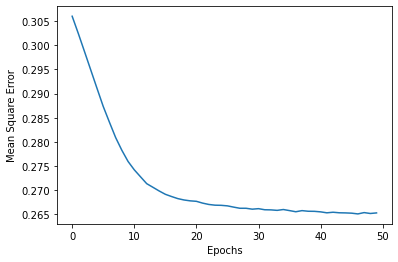

In [13]:
from matplotlib import pyplot
pyplot.plot(history.history['mean_squared_error'])
pyplot.xlabel("Epochs")
pyplot.ylabel("Mean Square Error")

pyplot.show()

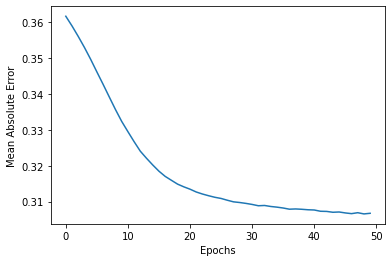

In [15]:
pyplot.plot(history.history['mae'])
pyplot.xlabel("Epochs")
pyplot.ylabel("Mean Absolute Error")


pyplot.show()

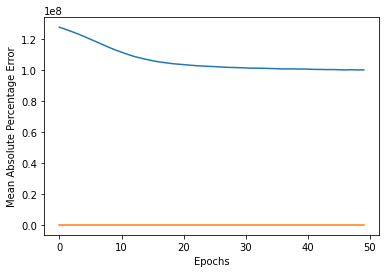

In [16]:
pyplot.plot(history.history['mape'])

pyplot.xlabel("Epochs")
pyplot.ylabel("Mean Absolute Percentage Error")
pyplot.plot(history.history['mae'])

pyplot.show()

In [10]:
yhat = model.predict(X_test)

In [17]:
model.save('modelCNN-batch500epoch50')

INFO:tensorflow:Assets written to: modelCNN-batch500epoch50\assets


In [11]:
yhat = yhat*3
yhat = yhat.round()
print(yhat[100])
print(y_test[100])

[2. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]


In [12]:
results=[]
total = 0
similar = 0
for i in range(len(y_test)):
    for j in range(len(y_test[i])):
        if y_test[i][j] == yhat[i][j]:
            similar += 1
        total += 1
acc = similar/total

print('>%.3f' % acc)
results.append(acc)

>0.718


## Training the CNN model with 50 epochs and a batch size of 1000

In [18]:
# get the model
def get_model():
    model = Sequential()
    model.add(Conv1D(32, kernel_size=(2), activation='relu', input_shape=(128, 850)))
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters=64, kernel_size=(5), activation='relu'))
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters=128, kernel_size=(5), activation="relu"))
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters=128, kernel_size=(5), activation="relu"))
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='softmax'))
    model.add(Dropout(0.5))
    model.add(Dense(60, activation='softmax'))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax'))
    return model
 
# evaluate a model using repeated k-fold cross-validation
adam = Adam(0.0005)
model = get_model()
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['MeanSquaredError','AUC','accuracy', 'mae', 'mape'])
history1 = model.fit(X_train, y_train, epochs=50, validation_data=(X_dev, y_dev), batch_size=1000)

Epoch 1/50
17/17 [==============================] - 80s 4s/step - loss: 0.3071 - mean_squared_error: 0.3071 - auc: 0.6194 - accuracy: 0.3145 - mae: 0.3625 - mape: 127987992.0000 - val_loss: 0.2656 - val_mean_squared_error: 0.2656 - val_auc: 0.7034 - val_accuracy: 0.6927 - val_mae: 0.3461 - val_mape: 128314032.0000
Epoch 2/50
17/17 [==============================] - 31s 2s/step - loss: 0.3053 - mean_squared_error: 0.3053 - auc: 0.6729 - accuracy: 0.5661 - mae: 0.3612 - mape: 127313192.0000 - val_loss: 0.2638 - val_mean_squared_error: 0.2638 - val_auc: 0.7014 - val_accuracy: 0.6927 - val_mae: 0.3446 - val_mape: 127607328.0000
Epoch 3/50
17/17 [==============================] - 27s 2s/step - loss: 0.3034 - mean_squared_error: 0.3034 - auc: 0.6856 - accuracy: 0.6668 - mae: 0.3598 - mape: 126623360.0000 - val_loss: 0.2620 - val_mean_squared_error: 0.2620 - val_auc: 0.6981 - val_accuracy: 0.6927 - val_mae: 0.3432 - val_mape: 126890592.0000
Epoch 4/50
17/17 [==============================] - 

In [19]:
yhat1 = model.predict(X_test)

In [20]:
model.save('modelCNN-batch1000epoch50')

INFO:tensorflow:Assets written to: modelCNN-batch1000epoch50\assets


In [22]:
yhat1 = yhat1*3
yhat1 = yhat1.round()


## Accuracy for emotions including intensity for batch size 100 and 50 epochs using the Adam optimizer

In [23]:
results=[]
total = 0
similar = 0
for i in range(len(y_test)):
    for j in range(len(y_test[i])):
        if y_test[i][j] == yhat1[i][j]:
            similar += 1
        total += 1
acc = similar/total

print('>%.3f' % acc)
results.append(acc)

>0.718


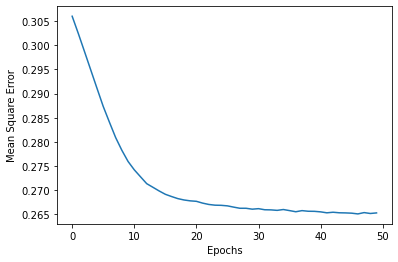

In [24]:
from matplotlib import pyplot
pyplot.plot(history.history['mean_squared_error'])
pyplot.xlabel("Epochs")
pyplot.ylabel("Mean Square Error")

pyplot.show()

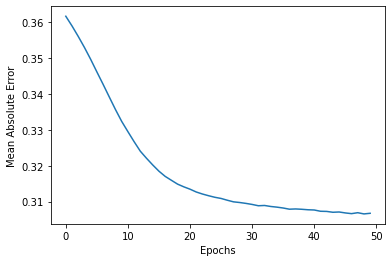

In [25]:
pyplot.plot(history.history['mae'])
pyplot.xlabel("Epochs")
pyplot.ylabel("Mean Absolute Error")


pyplot.show()

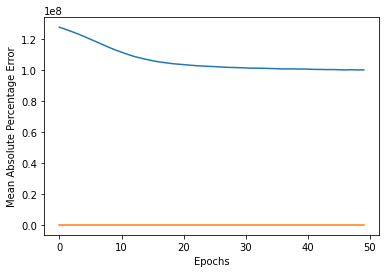

In [26]:
pyplot.plot(history.history['mape'])

pyplot.xlabel("Epochs")
pyplot.ylabel("Mean Absolute Percentage Error")
pyplot.plot(history.history['mae'])

pyplot.show()